In [1]:
#importing libraries  
from pandas import Series, DataFrame
import scipy
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
import seaborn as sb
import math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#checking for asumptions is the part we are doing after the data laoding and visualization part

# loading the dataset 

In [2]:
#loading the dataset
data=pd.read_csv('data_science_salary_2021.csv')

In [3]:
data.head()


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [5]:
visual = data[['Rating', 'Size','Founded', 'Revenue','Competitors','Hourly','Avg Salary(K)','Age','Python','spark','aws','excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an']]

In [6]:
correlations=visual.corr()

In [7]:
visual.corr()

,Rating,Founded,Hourly,Avg Salary(K),Age,Python,spark,aws,excel,sql,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Rating,1.000000,0.332927,-0.019531,0.012475,0.023162,0.144665,0.156982,0.117049,-0.036466,0.134463,...,0.076893,0.058564,0.110033,0.069042,0.145098,0.001717,0.039784,0.048338,0.035587,-0.019351
Founded,0.332927,1.000000,0.049313,-0.009609,0.139165,0.103183,0.066978,-0.011123,-0.035567,0.052368,...,0.005844,0.019728,0.022332,0.040374,0.025715,0.060605,0.055393,0.038379,0.058025,0.044355
Hourly,-0.019531,0.049313,1.000000,-0.243771,0.007847,-0.193487,-0.098530,-0.030315,-0.099897,-0.187319,...,-0.036872,-0.043062,-0.051221,-0.059934,-0.081895,-0.053132,-0.052237,-0.021369,-0.041884,-0.025354
Avg Salary(K),0.012475,-0.009609,-0.243771,1.000000,0.022076,0.315552,0.170678,0.172660,-0.072323,0.002008,...,0.115658,0.044759,0.178237,0.160098,0.110562,-0.074753,-0.044491,0.085859,0.070925,-0.123306
Age,0.023162,0.139165,0.007847,0.022076,1.000000,-0.098626,-0.102418,-0.033111,0.038846,-0.117977,...,-0.065947,-0.039562,-0.081608,-0.055830,-0.053311,-0.055828,0.020544,-0.058273,0.044605,-0.058240
Python,0.144665,0.103183,-0.193487,0.315552,-0.098626,1.000000,0.347619,0.203221,-0.021519,0.373999,...,0.190566,0.113676,0.254331,0.209430,0.235114,0.154118,0.167770,0.063615,0.080035,-0.027705
spark,0.156982,0.066978,-0.098530,0.170678,-0.102418,0.347619,1.000000,0.298822,-0.047334,0.261304,...,0.107790,0.032138,0.271394,0.237612,0.537081,-0.018655,-0.044026,0.216880,0.232356,-0.051017
aws,0.117049,-0.011123,-0.030315,0.172660,-0.033111,0.203221,0.298822,1.000000,-0.019235,0.106902,...,0.132776,0.110025,0.087712,0.116905,0.276749,-0.000834,0.032589,0.154647,0.177929,-0.077330
excel,-0.036466,-0.035567,-0.099897,-0.072323,0.038846,-0.021519,-0.047334,-0.019235,1.000000,0.109548,...,-0.030136,-0.065215,-0.023238,-0.078846,0.022847,0.145915,0.068613,-0.028762,0.094860,0.112628
sql,0.134463,0.052368,-0.187319,0.002008,-0.117977,0.373999,0.261304,0.106902,0.109548,1.000000,...,0.015975,-0.011757,0.096994,0.037589,0.278207,0.379234,0.248244,-0.049602,0.198825,0.056085


In [8]:
correlations["Avg Salary(K)"]

Rating           0.012475
Founded         -0.009609
Hourly          -0.243771
Avg Salary(K)    1.000000
Age              0.022076
Python           0.315552
spark            0.170678
aws              0.172660
excel           -0.072323
sql              0.002008
sas              0.101938
keras            0.115658
pytorch          0.044759
scikit           0.178237
tensor           0.160098
hadoop           0.110562
tableau         -0.074753
bi              -0.044491
flink            0.085859
mongo            0.070925
google_an       -0.123306
Name: Avg Salary(K), dtype: float64

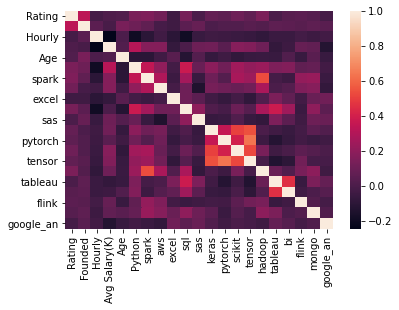

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

In [10]:
#check for the missing data and other irrelvant data and remove them
col_names=data.columns
num_data=data.shape[0]
print(num_data)
for c in col_names:
    num_non =data[c].isin(["?"]).sum()
    if num_non >0:
        print(c)
        print(num_non)
        print("{0:2f}%".format(float(num_non)/num_data*100))
data=data[data["Job Description"]!="?"]
data.shape
#so as we can see there is no missing or irrelevant data we can directly do one hot encoding by removing some of the redundant coilumns

742


(742, 42)

In [11]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [12]:
#features= data
target=data['Avg Salary(K)']


In [13]:
#features.drop(columns=['index','Avg Salary(K)','Salary Estimate','Job Description', 'Location','Lower Salary','Upper Salary', 'Headquarters' ])

In [14]:
#elemenet to be scaled
numerical=data[['Age','Hourly']]
target=data[['Avg Salary(K)']]

#labeled elements that are avoided in botha and concatinated at the last
labeled=data[['Python','spark','aws','sas','keras','scikit','tensor','hadoop','sql','flink','mongo','google_an']]

# one hot endoeing the elements for MLP data
categoricals=data[['seniority_by_title','Degree','Location']]

# one hot endoeing the elements for Linear data
categorical=data[['seniority_by_title','Degree']]


In [15]:
scaler = StandardScaler()
numerical_scaleds=scaler.fit_transform(numerical)
scaler_target=StandardScaler()
numerical_targets=scaler.fit_transform(target)

#x = scaler.fit_transform(dff1)
#df = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])
numerical_scaled=pd.DataFrame(numerical_scaleds)
numerical_target=pd.DataFrame(numerical_targets)

numerical_target.head()
numerical_scaled.head()


,0,1
0,0.008842,-0.182828
1,-0.195608,-0.182828
2,-0.678854,-0.182828
3,0.157533,-0.182828
4,-0.455818,-0.182828


In [16]:
#one hot encoding using pandas
numerical_one_hot =pd.get_dummies(categoricals)

#one hot encoding for linear data
numerical_one_hot_linear =pd.get_dummies(categorical)


In [17]:
#concatinating one hot encoded variables and the labeled variables
frames = [numerical_one_hot, labeled,numerical_scaled]


concat_dataset=pd.concat(frames, axis=1)


#concatinate for linear
frame = [numerical_one_hot_linear, labeled,numerical_scaled]

concat_dataset_linear=pd.concat(frame, axis=1)



In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    concat_dataset, numerical_target, test_size=0.25, random_state=1)


X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    concat_dataset_linear, numerical_target, test_size=0.25, random_state=1)



In [19]:

#accuracy of the model
from sklearn.linear_model import LinearRegression

regressionmodel = LinearRegression().fit(X_train_linear, y_train_linear)


In [20]:
#mean square error in sklearn
preocted_values = regressionmodel.predict(X_test_linear).reshape((-1,))

model_error_absolute = mean_absolute_error(y_test_linear, preocted_values)
print(f"The mean squared absolute error of the optimal model is {model_error_absolute:.2f}")



The mean squared absolute error of the optimal model is 0.66


In [21]:

X_train.shape[1]

220

# MLP 1

In [22]:
#deeplearning approach
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(50, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(25, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                11050     
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 12,351
Trainable params: 12,351
Non-trainable params: 0
_________________________________________________________________


In [23]:
NN_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split = 0.2)


Epoch 1/300
14/14 [==============================] - 1s 12ms/step - loss: 0.8062 - mean_absolute_error: 0.8062 - val_loss: 0.7260 - val_mean_absolute_error: 0.7260
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 0.8007 - mean_absolute_error: 0.8007 - val_loss: 0.7174 - val_mean_absolute_error: 0.7174
Epoch 3/300
14/14 [==============================] - 0s 3ms/step - loss: 0.7883 - mean_absolute_error: 0.7883 - val_loss: 0.6980 - val_mean_absolute_error: 0.6980
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 0.7574 - mean_absolute_error: 0.7574 - val_loss: 0.6575 - val_mean_absolute_error: 0.6575
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6931 - mean_absolute_error: 0.6931 - val_loss: 0.6109 - val_mean_absolute_error: 0.6109
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6180 - mean_absolute_error: 0.6180 - val_loss: 0.5920 - val_mean_absolute_error: 0.5920
Epoch 7/300
14/14 [==

In [24]:
from sklearn.metrics import mean_squared_error
pred = NN_model.predict(X_test).reshape((-1,))

loss_abs1 = mean_absolute_error(y_test, pred)


print("The mean absoulte error loss of the  model1 is:", loss_abs1)


The mean absoulte error loss of the  model1 is: 0.4487923800049779


# MLP 2

In [59]:
##model 2

hidden_units2 = 100
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model2 = Sequential([
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(75, kernel_initializer='normal', activation='relu'),
    Dense(25, kernel_initializer='normal', activation='relu'),
      Dropout(0.2),

    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model2
# build the model
model2 = build_model_using_sequential()

In [60]:
model2.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000022073209A00>>

In [61]:
model2 = build_model_using_sequential()

In [62]:
msle = MeanSquaredLogarithmicError()
model2.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model2.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=50,
    validation_split=0.1
)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 0.1369 - mean_squared_logarithmic_error: 0.1369 - val_loss: 0.0835 - val_mean_squared_logarithmic_error: 0.0637
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0927 - mean_squared_logarithmic_error: 0.0927 - val_loss: 0.0734 - val_mean_squared_logarithmic_error: 0.0498
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0717 - mean_squared_logarithmic_error: 0.0717 - val_loss: 0.0722 - val_mean_squared_logarithmic_error: 0.0431
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0556 - mean_squared_logarithmic_error: 0.0556 - val_loss: 0.0647 - val_mean_squared_logarithmic_error: 0.0380
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0488 - mean_squared_logarithmic_error: 0.0488 - val_loss: 0.0653 - val_mean_squared_logarithmic_error: 0.0392
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0

In [63]:
from sklearn.metrics import mean_squared_error
pred2 = model2.predict(X_test)

loss_abs2 = mean_absolute_error(y_test, pred2)
print("The mean absoulte error loss of the  model 2 is:", loss_abs2)

The mean absoulte error loss of the  model 2 is: 0.5831369918981913


# MLP 3

In [30]:
model3 = Sequential()
model3.add(Dense(50))
model3.add(LeakyReLU(alpha=0.3))
model3.add(Dense(25))
model3.add(LeakyReLU(alpha=0.3))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_absolute_error', optimizer='RMSprop')

In [31]:
model3.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)


Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 0.7516 - val_loss: 0.6351
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6463 - val_loss: 0.5911
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5920 - val_loss: 0.5745
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5551 - val_loss: 0.5657
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5326 - val_loss: 0.5604
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5098 - val_loss: 0.5548
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4839 - val_loss: 0.5513
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4667 - val_loss: 0.5471
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4447 - val_loss: 0.5445
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4305 - val_loss: 0.5437
Epoch 11/

In [32]:
pred3 = model3.predict(X_test)

loss_abs3 = mean_absolute_error(y_test, pred3)
print("The mean absolute error of model 3 is:", loss_abs3)

The mean absolute error of model 3 is: 0.4221451177059507
